In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely.geometry
import seaborn as sns
import plotly.express as px
import re
from matplotlib.colors import TwoSlopeNorm
import missingno as msno
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import math

In [2]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
pd.set_option('display.max_columns', None)

In [3]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200

In [4]:
# Projected Coordinate System: how you project onto a 2D plane
epsg_2d = 26717 
# Toronto Police Service Open Data includes geographic location information provided in
# the projected coordinate system NAD 1927 UTM 17N
# https://epsg.io/26717

# Geographic Coordinate System: how coordinates are represented in a 3D space
# World Geodetic System 1984 (WGS84)
# https://epsg.io/4326
epsg_3d = 4326 

In [5]:
stations_point = gpd.read_file('../data/processed/stations_point.geojson')
stations_area = gpd.read_file('../data/processed/stations_area.geojson')

# Import major crime indicators

















































































































































































































In [6]:
# geojson format is too big -> use csv instead
mci_select = pd.read_csv('../data/processed/mci_select.csv')
# mci_select['geometry'] = mci_select.apply(lambda x: shapely.geometry.Point(x['longitude'], x['latitude']), axis=1)
# mci_select = gpd.GeoDataFrame(mci_select, crs='epsg:' + str(epsg_3d), geometry='geometry')

In [7]:
mci_select

EVENT_UNIQUE_ID             OCC_DATE  OCC_YEAR OCC_MONTH  OCC_DAY   
0       GO-20141260701  2014-01-01 05:00:00      2014   January        1  \
1       GO-20141260889  2014-01-01 05:00:00      2014   January        1   
2       GO-20141261050  2014-01-01 05:00:00      2014   January        1   
3       GO-20141259344  2014-01-01 05:00:00      2014   January        1   
4       GO-20141260233  2014-01-01 05:00:00      2014   January        1   
...                ...                  ...       ...       ...      ...   
321816  GO-20222396611  2022-12-08 00:00:00      2022  December        8   
321817  GO-20222413771  2022-12-10 00:00:00      2022  December       10   
321818  GO-20222452652  2022-12-16 00:00:00      2022  December       16   
321819  GO-20222467066  2022-12-18 00:00:00      2022  December       18   
321820  GO-20222554708  2022-12-30 00:00:00      2022  December       30   

          OCC_DOW  OCC_DOY DIVISION HOOD_158       NEIGHBOURHOOD_158   
0       Wednesday        1      D51       70         South Riverdale  \
1       Wednesday        1      D51       74     North St.James Town   
2       Wednesday        1      D54       69             Blake-Jones   
3       Wednesday        1      D52      164        Wellington Place   
4       Wednesday        1      D41      126             Dorset Park   
...           ...      ...      ...      ...                     ...   
321816   Thursday      342      D11       88         High Park North   
321817   Saturday      344      D54       61           Taylor-Massey   
321818     Friday      350      D43      135             Morningside   
321819     Sunday      352      D52      170      Yonge-Bay Corridor   
321820     Friday      364      D42      118  Tam O'Shanter-Sullivan   

        LONGITUDE   LATITUDE              MCI  OCC_QTR   
0      -79.350229  43.646293  Break and Enter        1  \
1      -79.376497  43.666423          Assault        1   
2      -79.344839  43.678946          Assault        1   
3      -79.391841  43.646639          Assault        1   
4      -79.281075  43.765796  Break and Enter        1   
...           ...        ...              ...      ...   
321816 -79.468219  43.656326         Homicide        4   
321817 -79.292176  43.696072         Homicide        4   
321818 -79.205111  43.765038         Homicide        4   
321819 -79.382467  43.645286         Homicide        4   
321820 -79.300392  43.780503         Homicide        4   

                                          geometry  
0        POINT (-79.3502294146631 43.646293183398)  
1       POINT (-79.3764972556894 43.6664227324718)  
2       POINT (-79.3448392239802 43.6789458527888)  
3       POINT (-79.3918413604065 43.6466392084374)  
4       POINT (-79.2810747937924 43.7657958510698)  
...                                            ...  
321816            POINT (-79.46821933 43.65632622)  
321817            POINT (-79.29217555 43.69607151)  
321818            POINT (-79.20511142 43.76503825)  
321819            POINT (-79.38246743 43.64528606)  
321820             POINT (-79.30039226 43.7805032)  

[321821 rows x 15 columns]

In [8]:
mci_select.MCI.unique()

array(['Break and Enter', 'Assault', 'Robbery', 'Auto Theft',
       'Theft Over', 'Shootings', 'Homicide'], dtype=object)

In [9]:
mci_select.columns

Index(['EVENT_UNIQUE_ID', 'OCC_DATE', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY',
       'OCC_DOW', 'OCC_DOY', 'DIVISION', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'LONGITUDE', 'LATITUDE', 'MCI', 'OCC_QTR', 'geometry'],
      dtype='object')

In [12]:
mci_select.replace({'OCC_MONTH': {'January': 'Jan', 
                                        'February': 'Feb', 
                                        'March': 'Mar', 
                                        'April': 'Apr', 
                                        'May': 'May', 
                                        'June': 'Jun', 
                                        'July': 'Jul', 
                                        'August': 'Aug', 
                                        'September': 'Sep', 
                                        'October': 'Oct', 
                                        'November': 'Nov', 
                                        'December': 'Dec'},
                    'OCC_DOW': {'Monday': "Mon", 
                                            'Tuesday': "Tue", 
                                            'Wednesday': "Wed", 
                                            'Thursday': "Thu", 
                                            'Friday': "Fri", 
                                            'Saturday': "Sat", 
                                            'Sunday': "Sun"}}, inplace=True)

# Distribution by time period

Text(0.5, 0.98, 'Number of crimes by time period in City of Toronto')

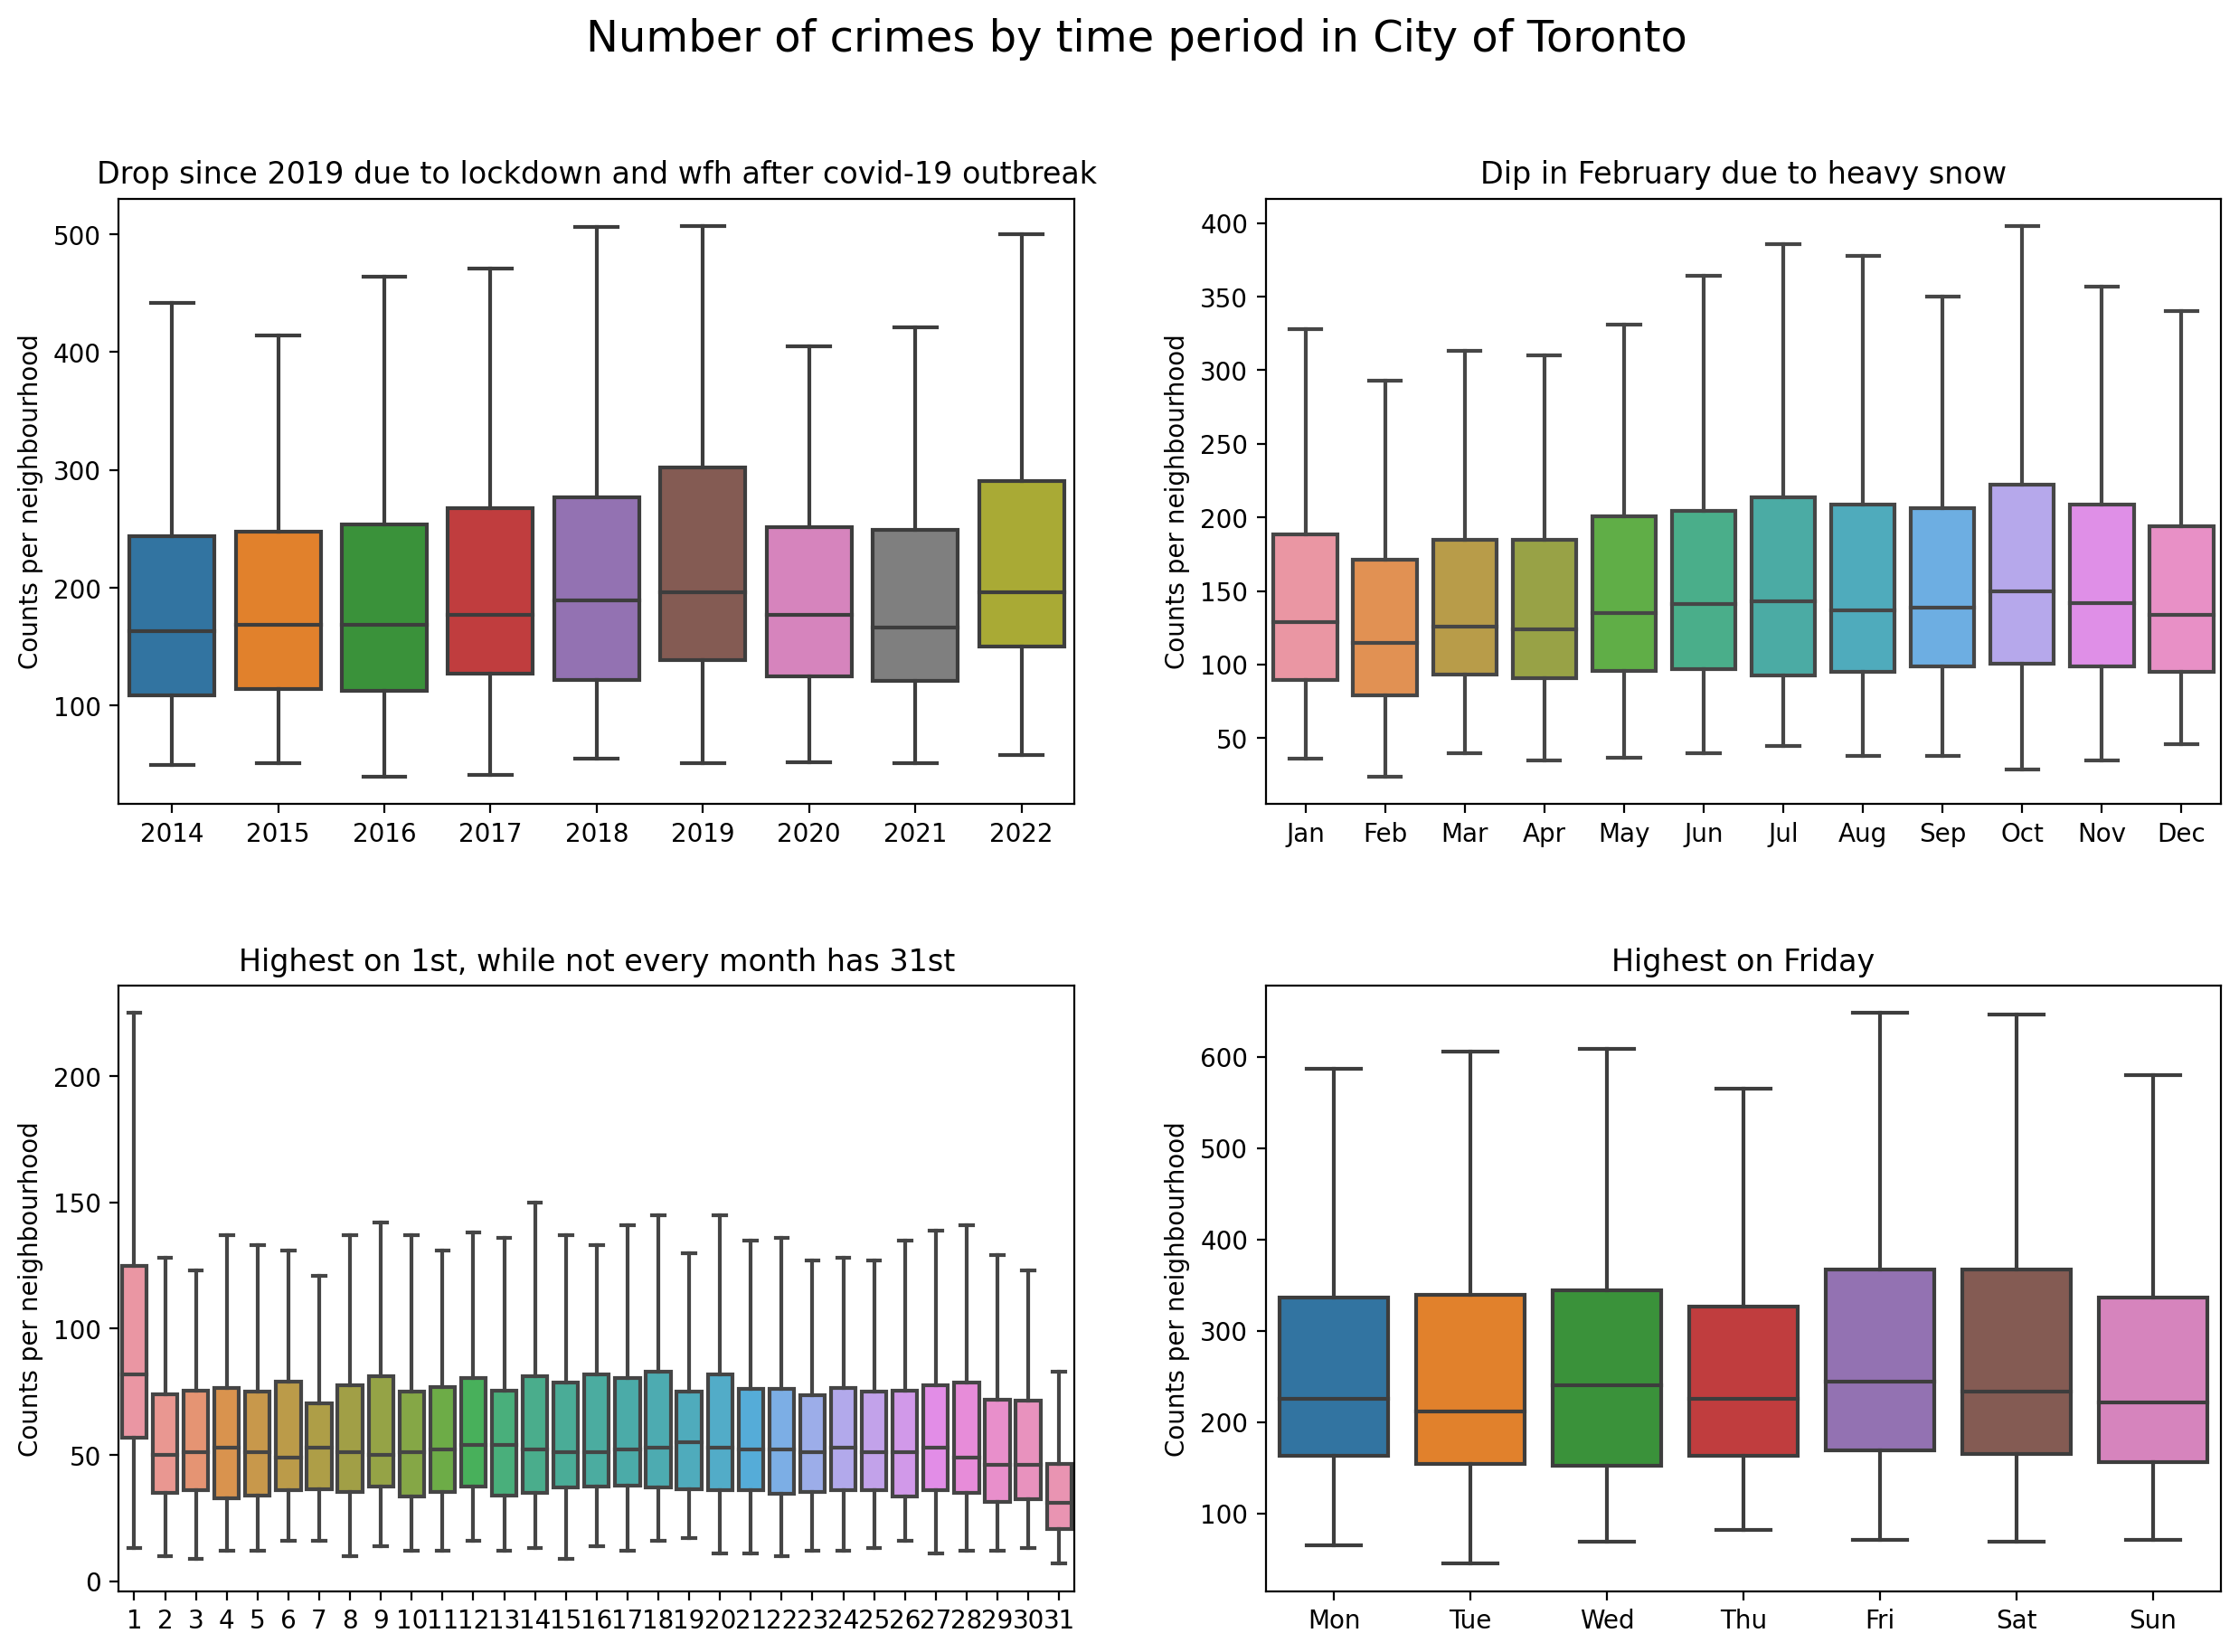

In [16]:
vars = ['OCC_YEAR', 
        'OCC_MONTH', 
        'OCC_DAY',
        'OCC_DOW']
vars_cat = [sorted(mci_select.OCC_YEAR.unique()),
            ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            np.arange(1,32,1),
            ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
            ]
titles = ['Drop since 2019 due to lockdown and wfh after covid-19 outbreak',
         'Dip in February due to heavy snow',
         'Highest on 1st, while not every month has 31st',
         'Highest on Friday']

fig, axes = plt.subplots(int(len(vars)/2),2)
plt.subplots_adjust(hspace=0.3)
for var, var_cat, title, ax in zip(vars, vars_cat, titles, axes.flatten()):    
    mci_select[var] = mci_select[var].astype('category').cat.set_categories(var_cat)
    sns.boxplot(data = mci_select.groupby(['NEIGHBOURHOOD_158', var]).size().reset_index(name='count'), 
                x = var,
                y = 'count',
                showfliers = False,
                ax = ax)
    ax.set_ylabel('Counts per neighbourhood')
    ax.set_xlabel('')
    ax.set_title(title)

fig.suptitle('Number of crimes by time period in City of Toronto', size='xx-large')

# Time trend by type of crime

In [19]:
vars = sorted(mci_select.MCI.unique())
fig, axes = plt.subplots(int(math.ceil(len(vars)/3)),3)
plt.subplots_adjust(hspace=0.5)
for var, ax in zip(vars, axes.flatten()):    
    sns.boxplot(data = mci_select[mci_select.MCI == var].groupby(['NEIGHBOURHOOD_158', 'OCC_YEAR']).size().reset_index(name='count'), 
                x = 'OCC_YEAR',
                y = 'count',
                showfliers = False,
                ax = ax)
    ax.set_ylabel('Counts per neighbourhood')
    ax.set_xlabel('')
    ax.set_title(f"{var}")

fig.suptitle('Number of crimes by type in Toronto neighbourhoods', size='xx-large')
plt.tight_layout()

# Neighbourhood crime rate and density

In [20]:
crime_by_quarter = pd.read_csv('../data/processed/neighbourhoods_crime.csv')
crime_by_quarter.HOOD_ID = crime_by_quarter.HOOD_ID.astype(str)
crime_by_quarter

NEIGHBOURHOOD_158 HOOD_ID  OCC_YEAR  OCC_QTR       area    POP   
0       West Humber-Clairville       1      2014        1  30.145071  34437  \
1       West Humber-Clairville       1      2014        1  30.145071  34437   
2       West Humber-Clairville       1      2014        1  30.145071  34437   
3       West Humber-Clairville       1      2014        1  30.145071  34437   
4       West Humber-Clairville       1      2014        1  30.145071  34437   
...                        ...     ...       ...      ...        ...    ...   
136507     Mount Pleasant East      99      2022        4   3.093345  16620   
136508     Mount Pleasant East      99      2022        1   3.093345  16620   
136509     Mount Pleasant East      99      2022        2   3.093345  16620   
136510     Mount Pleasant East      99      2022        3   3.093345  16620   
136511     Mount Pleasant East      99      2022        4   3.093345  16620   

                    MCI     type      value  
0               Assault    count  55.000000  
1            Auto Theft    count  64.000000  
2       Break and Enter    count  41.000000  
3              Homicide    count   0.000000  
4               Robbery    count  13.000000  
...                 ...      ...        ...  
136507       Theft Over  density   0.323275  
136508              MCI  density  11.961163  
136509              MCI  density  13.254262  
136510              MCI  density   8.405142  
136511              MCI  density  12.607712  

[136512 rows x 9 columns]

In [21]:
crime_by_year = crime_by_quarter.groupby(['HOOD_ID', 'OCC_YEAR', 'MCI', 'type']).value.sum().reset_index()
crime_by_year

HOOD_ID  OCC_YEAR         MCI     type       value
0           1      2014     Assault    count  296.000000
1           1      2014     Assault  density    9.819184
2           1      2014     Assault     rate  859.540610
3           1      2014  Auto Theft    count  312.000000
4           1      2014  Auto Theft  density   10.349951
...       ...       ...         ...      ...         ...
34123      99      2022   Shootings  density    0.323275
34124      99      2022   Shootings     rate    6.016847
34125      99      2022  Theft Over    count    4.000000
34126      99      2022  Theft Over  density    1.293099
34127      99      2022  Theft Over     rate   24.067389

[34128 rows x 5 columns]

In [22]:
neighbourhoods = gpd.read_file('../data/processed/neighbourhoods.geojson')

In [24]:
neighbourhoods_crime = neighbourhoods[['HOOD_ID', 'geometry']].drop_duplicates(subset = 'HOOD_ID').merge(crime_by_year, on='HOOD_ID', how='inner')
neighbourhoods_crime

HOOD_ID                                           geometry  OCC_YEAR   
0           1  MULTIPOLYGON (((-79.59037 43.73402, -79.58943 ...      2014  \
1           1  MULTIPOLYGON (((-79.59037 43.73402, -79.58943 ...      2014   
2           1  MULTIPOLYGON (((-79.59037 43.73402, -79.58943 ...      2014   
3           1  MULTIPOLYGON (((-79.59037 43.73402, -79.58943 ...      2014   
4           1  MULTIPOLYGON (((-79.59037 43.73402, -79.58943 ...      2014   
...       ...                                                ...       ...   
34123      99  MULTIPOLYGON (((-79.38710 43.71481, -79.38664 ...      2022   
34124      99  MULTIPOLYGON (((-79.38710 43.71481, -79.38664 ...      2022   
34125      99  MULTIPOLYGON (((-79.38710 43.71481, -79.38664 ...      2022   
34126      99  MULTIPOLYGON (((-79.38710 43.71481, -79.38664 ...      2022   
34127      99  MULTIPOLYGON (((-79.38710 43.71481, -79.38664 ...      2022   

              MCI     type       value  
0         Assault    count  296.000000  
1         Assault  density    9.819184  
2         Assault     rate  859.540610  
3      Auto Theft    count  312.000000  
4      Auto Theft  density   10.349951  
...           ...      ...         ...  
34123   Shootings  density    0.323275  
34124   Shootings     rate    6.016847  
34125  Theft Over    count    4.000000  
34126  Theft Over  density    1.293099  
34127  Theft Over     rate   24.067389  

[34128 rows x 6 columns]

In [25]:
crime_type = neighbourhoods_crime.MCI.unique()
crime_type

array(['Assault', 'Auto Theft', 'Break and Enter', 'Homicide', 'MCI',
       'Robbery', 'Shootings', 'Theft Over'], dtype=object)

In [26]:
# set custom order for display
custom_crime_order = ['MCI','Assault', 'Auto Theft','Break and Enter','Robbery','Theft Over','Homicide','Shootings']
crime_years = sorted(neighbourhoods_crime.OCC_YEAR.unique())

In [27]:
def plot_crime(var, title):
    fig, axes = plt.subplots(len(crime_years), len(custom_crime_order))

    for j in range(axes.shape[1]):
        # fix the range for each type of crime so we can compare across years
        vmin, vmax = neighbourhoods_crime[(neighbourhoods_crime['MCI'] == custom_crime_order[j]) & 
                                          (neighbourhoods_crime['type'] == var)].value.agg(['min', 'max'])
        norm = TwoSlopeNorm(vmin=vmin, vcenter= np.mean([vmin, vmax]), vmax=vmax)
        print("printing", custom_crime_order[j])
        for i in range(axes.shape[0]):  
            try:
                neighbourhoods_crime[(neighbourhoods_crime['MCI'] == custom_crime_order[j]) & 
                                     (neighbourhoods_crime['OCC_YEAR'] == crime_years[i]) & 
                                     (neighbourhoods_crime['type'] == var)].\
                                         plot(column = 'value', 
                                              cmap = 'viridis',
                                              norm = norm,
                                              ax = axes[i, j])
            except:
                print(f"problem with {custom_crime_order[j]} and {crime_years[i]}")
                break
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].set_yticks([])
            if i == 0:
                axes[i,j].set_title(custom_crime_order[j])
            if j == 0:
                axes[i,j].set_ylabel(crime_years[i], rotation=90, size='large')

    title = title + "\n(normalized by each crime type)"
    fig.suptitle(title, size='xx-large')

## plot map

In [28]:
plot_crime('density', 'Density: Number of crime per area of 1 km^2 in City of Toronto\n(MCI = All except Homicide and Shootings)')

printing MCI
printing Assault
printing Auto Theft
printing Break and Enter
printing Robbery
printing Theft Over
printing Homicide
printing Shootings


printing MCI
printing Assault
printing Auto Theft
printing Break and Enter
printing Robbery
printing Theft Over
printing Homicide
printing Shootings


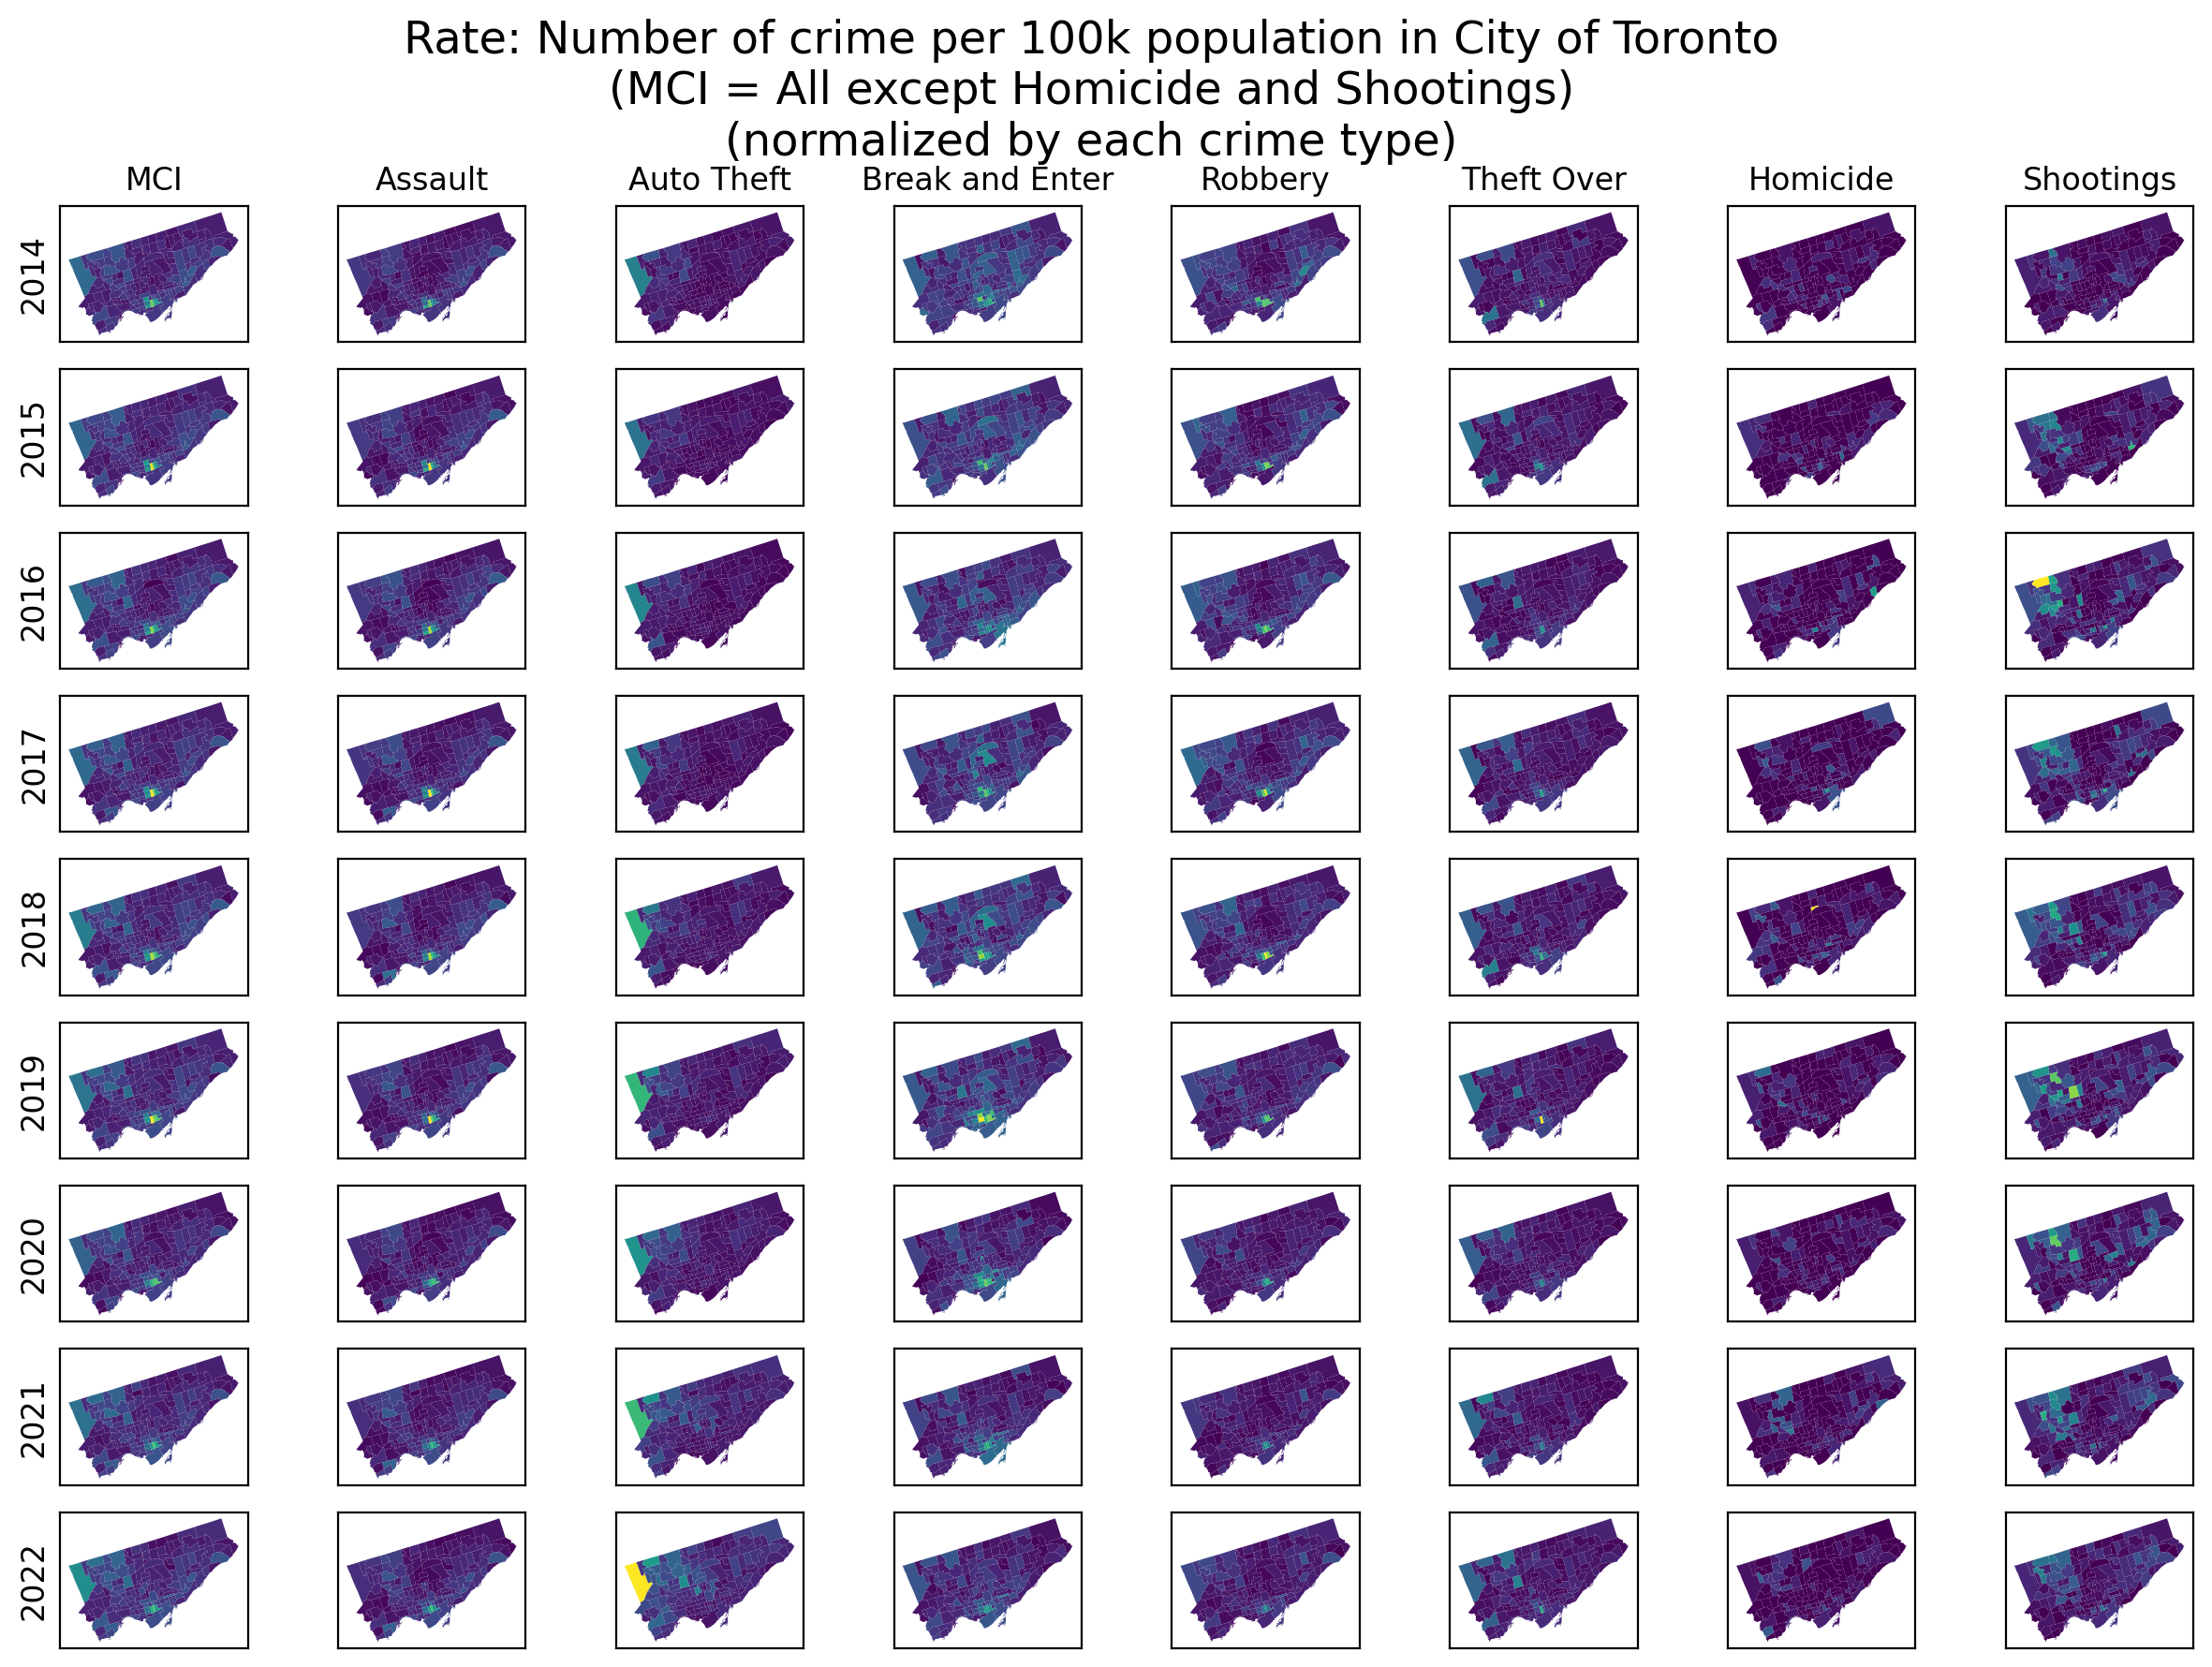

In [29]:
plot_crime('rate', 'Rate: Number of crime per 100k population in City of Toronto\n(MCI = All except Homicide and Shootings)')

printing MCI
printing Assault
printing Auto Theft
printing Break and Enter
printing Robbery
printing Theft Over
printing Homicide
printing Shootings


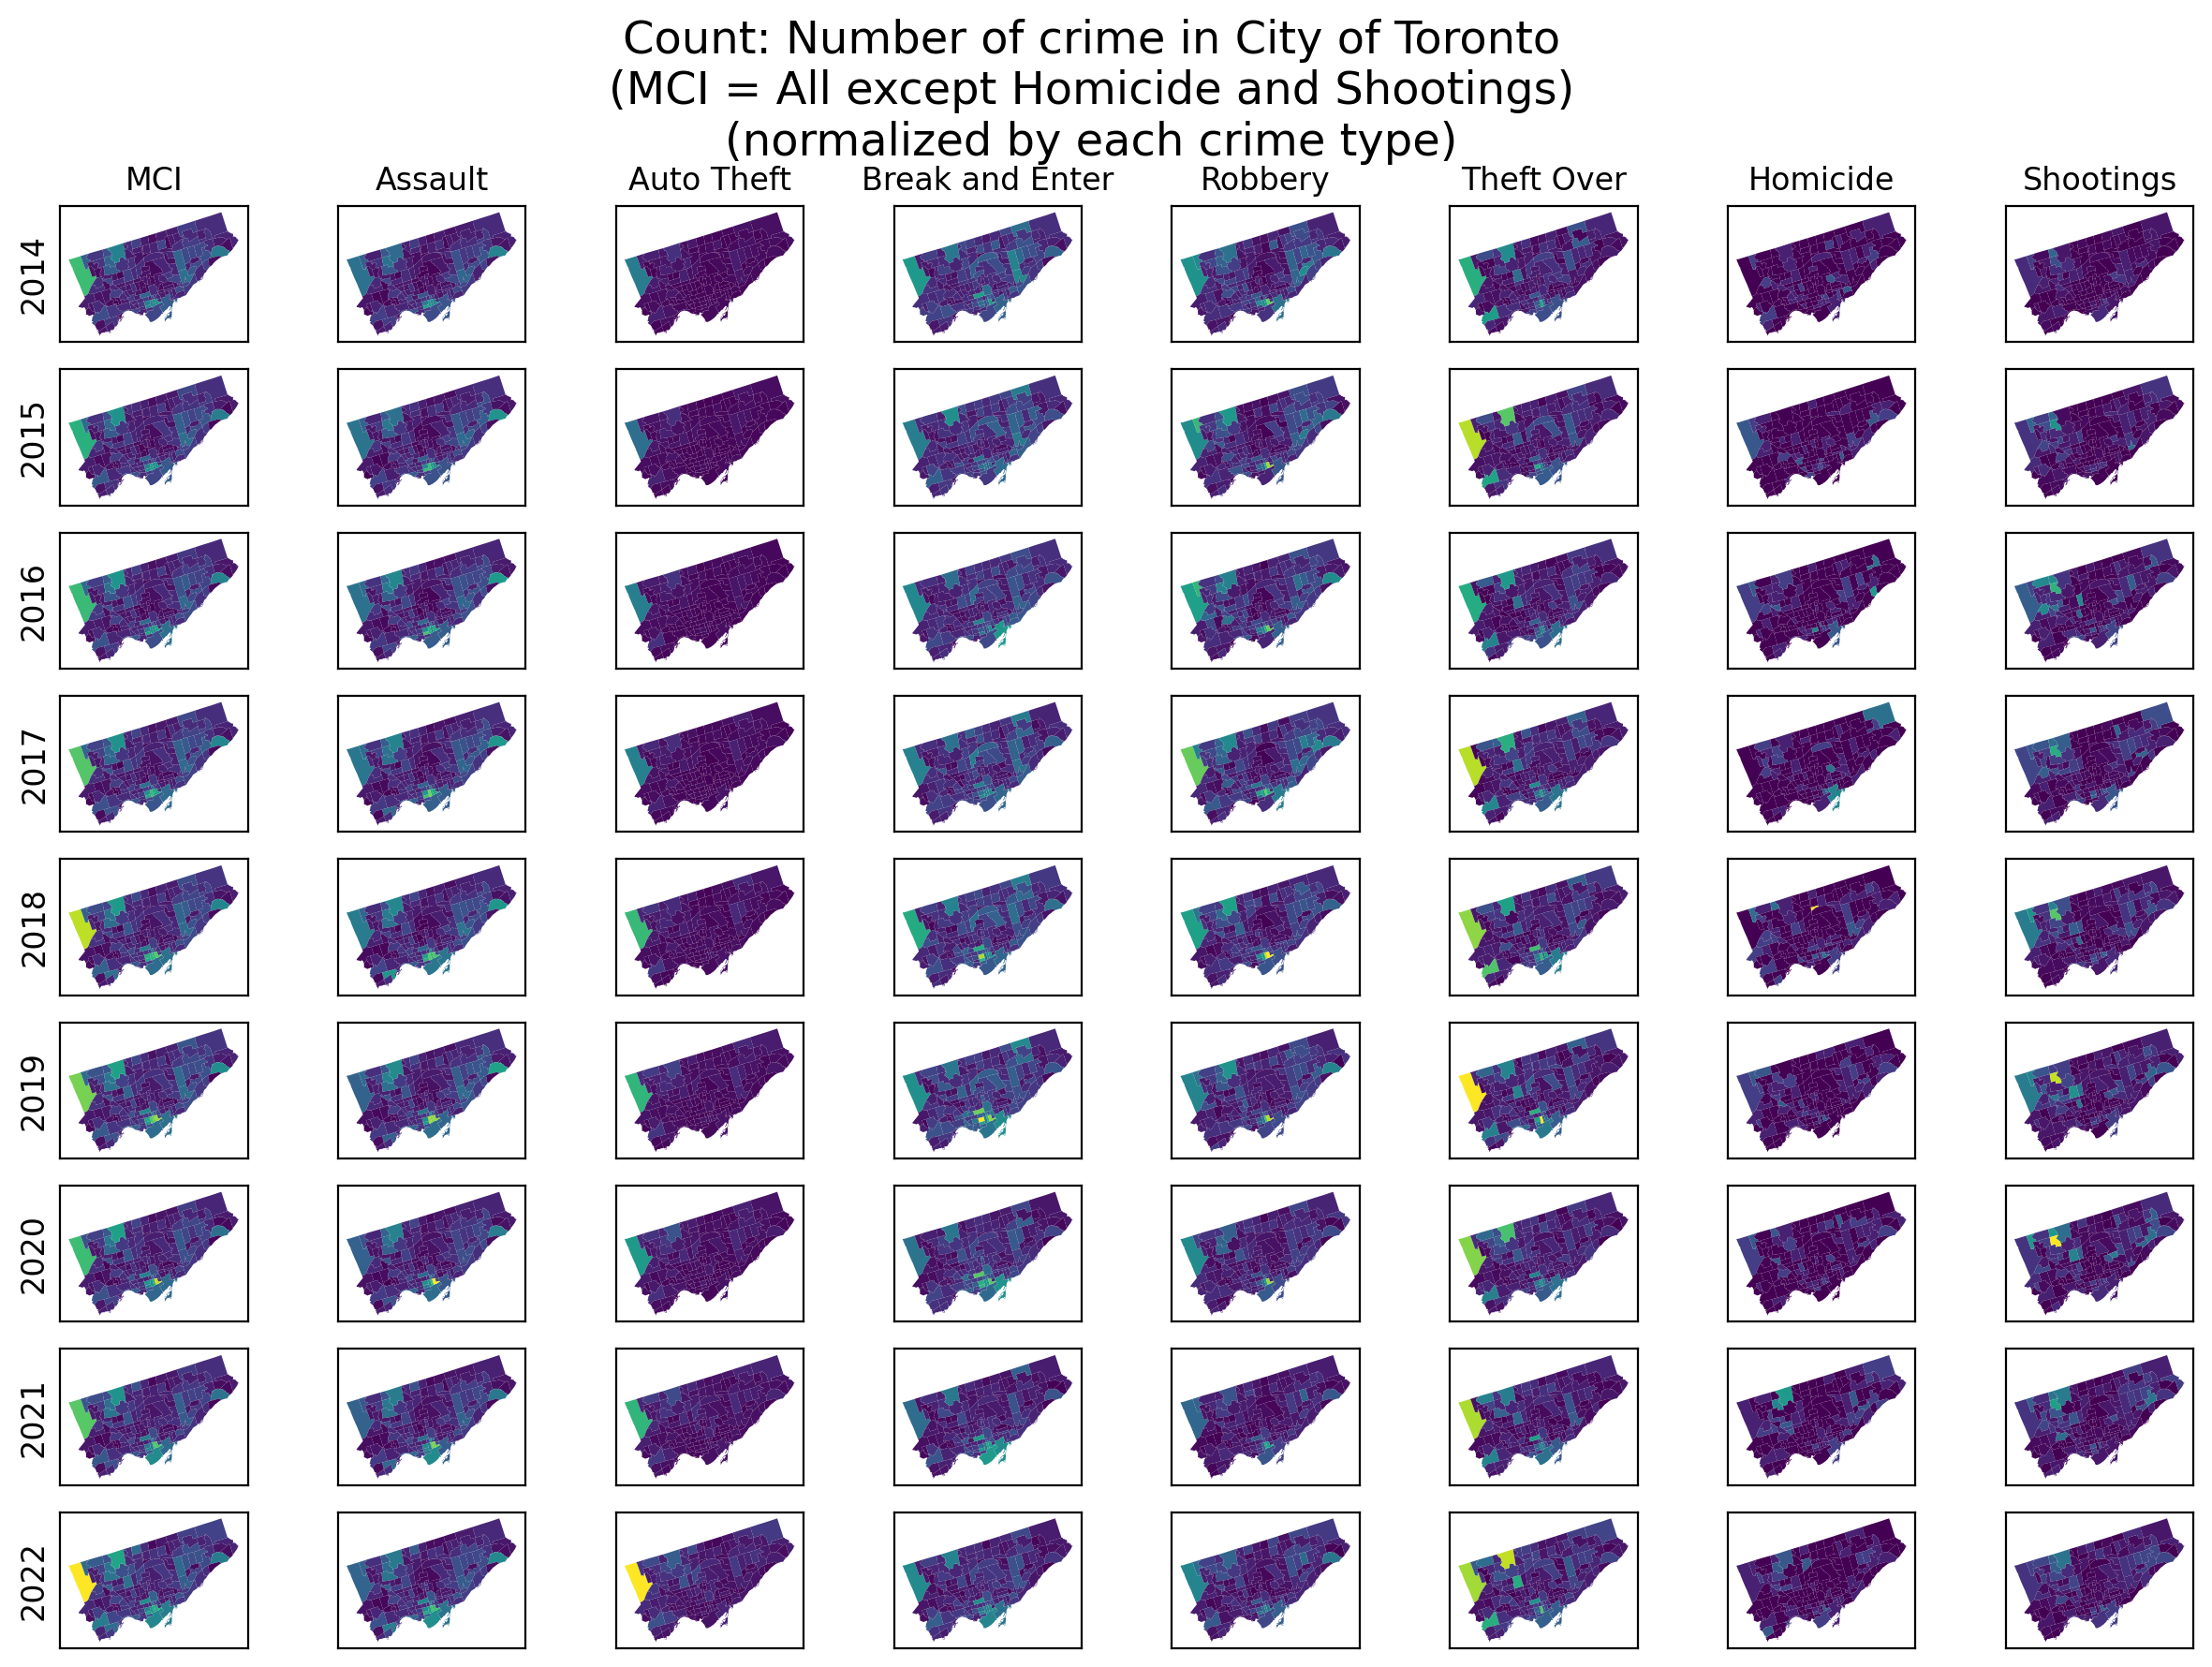

In [30]:
plot_crime('count', 'Count: Number of crime in City of Toronto\n(MCI = All except Homicide and Shootings)')

In [60]:
hood_id_annotation = neighbourhoods_crime.drop_duplicates(subset = 'HOOD_ID').to_crs(epsg=epsg_2d)
hood_id_annotation['centroid'] = hood_id_annotation.geometry.centroid
hood_id_annotation = hood_id_annotation.to_crs(epsg=epsg_3d)
hood_id_annotation.drop(columns = 'geometry', inplace = True)
hood_id_annotation

HOOD_ID  OCC_YEAR      MCI   type  value                        centroid
0           1      2014  Assault  count  296.0  POINT (613067.389 4841081.458)
216        10      2014  Assault  count   24.0  POINT (617337.660 4835585.872)
432       100      2014  Assault  count   53.0  POINT (628620.445 4840086.299)
648       101      2014  Assault  count   24.0  POINT (627777.696 4838940.856)
864       102      2014  Assault  count   28.0  POINT (626641.662 4839995.070)
...       ...       ...      ...    ...    ...                             ...
33048      95      2014  Assault  count  213.0  POINT (628658.161 4836408.995)
33264      96      2014  Assault  count   26.0  POINT (628313.322 4837543.036)
33480      97      2014  Assault  count   18.0  POINT (629117.388 4838225.970)
33696      98      2014  Assault  count   65.0  POINT (630596.930 4837693.238)
33912      99      2014  Assault  count   32.0  POINT (630123.283 4840130.688)

[158 rows x 6 columns]

In [64]:
hood_id_annotation.set_geometry('centroid', inplace = True)
hood_id_annotation = hood_id_annotation.to_crs(epsg=epsg_3d)

In [67]:
var = "rate"
MCI_type = "Shootings"
year = neighbourhoods_crime['OCC_YEAR'].max()
ax = neighbourhoods_crime[(neighbourhoods_crime['MCI'] == MCI_type) & 
                          (neighbourhoods_crime['OCC_YEAR'] == year) & 
                          (neighbourhoods_crime['type'] == var)].\
                              plot(column = 'value', 
                                   edgecolor = 'black',
                                   cmap = 'viridis',
                                   # norm = norm,
                                   legend = True)


stations_area.plot(column = 'line', 
                edgecolor = 'black', 
                alpha = 0.5,
                cmap = 'tab20',
                legend = True,
                legend_kwds = {'loc': 'upper right', 
                                'ncol': 2,
                                'edgecolor': 'lightgrey'},
                ax = ax)
stations_point.plot(ax=ax, 
                    color = 'blue', 
                    markersize = 3)

# hood_id_annotation.plot(ax=ax, color='white', markersize=3)
for idx, row in hood_id_annotation.iterrows():
   ax.annotate(text=row['HOOD_ID'], xy=(row['centroid'].x, row.centroid.y), horizontalalignment='center', color='white',
               size=8)

ax.set_title(var + f": number of {MCI_type} crime per 100k People in {year}")
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")

Text(0.5, 257.4804976205214, 'Longitude')

# Crime around subway stations

In [37]:
mci_select['geometry'] = mci_select.apply(lambda x: shapely.geometry.Point(x['longitude'], x['latitude']), axis=1)
mci_point = gpd.GeoDataFrame(mci_select, crs='epsg:' + str(epsg_3d), geometry='geometry')

c:\Users\willi\miniconda3\envs\police\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.



In [38]:
custom_crime_order

['MCI',
 'Assault',
 'Auto Theft',
 'Break and Enter',
 'Robbery',
 'Theft Over',
 'Homicide',
 'Shootings']

In [48]:
year = neighbourhoods_crime['occurrence_year'].max()
crime_around_stations = gpd.sjoin(mci_point.loc[(mci_point['occurrence_year'] == year), ['occurrence_unique_id', 'hood_id', 'MCI', 'geometry']], 
                                  stations_area[['station', 'geometry']],
                                  predicate='intersects')
crime_around_stations

occurrence_unique_id hood_id              MCI  \
20744          GO-202122996      14          Assault   
20751          GO-202150337      14          Assault   
20761         GO-2021148145      14  Break and Enter   
20766         GO-2021157512      14  Break and Enter   
20790         GO-2021298954      14          Assault   
...                     ...     ...              ...   
239465       GO-20211987682     137       Auto Theft   
239647        GO-2021217650     137          Robbery   
239703        GO-2021589809     137          Assault   
240140        GO-2021835964     137       Auto Theft   
247504       GO-20212463489     127        Shootings   

                          geometry  index_right    station  
20744   POINT (-79.52686 43.64789)           39  islington  
20751   POINT (-79.52686 43.64789)           39  islington  
20761   POINT (-79.52560 43.64419)           39  islington  
20766   POINT (-79.52560 43.64419)           39  islington  
20790   POINT (-79.52547 43.64721)           39  islington  
...                            ...          ...        ...  
239465  POINT (-79.24981 43.77252)           70    mccowan  
239647  POINT (-79.25146 43.77214)           70    mccowan  
239703  POINT (-79.25050 43.77667)           70    mccowan  
240140  POINT (-79.25050 43.77667)           70    mccowan  
247504  POINT (-79.25220 43.77457)           70    mccowan  

[7117 rows x 6 columns]

In [49]:
station_rank = crime_around_stations.groupby(['station']).size().sort_values(ascending=False).reset_index(name = 'crime_count')
station_rank

station  crime_count
0            dundas          613
1           college          399
2         wellesley          361
3             queen          358
4       bloor yonge          352
..              ...          ...
68  york university           14
69         old mill           10
70   downsview park            9
71  pioneer village            8
72        ellesmere            5

[73 rows x 2 columns]

In [50]:
MCI_type = "MCI"
year = neighbourhoods_crime['occurrence_year'].max()
var = 'density'
ax = neighbourhoods_crime[(neighbourhoods_crime['MCI'] == MCI_type) & 
                          (neighbourhoods_crime['occurrence_year'] == year) & 
                          (neighbourhoods_crime['type'] == var)].\
                              plot(column = 'value', 
                                   edgecolor = 'black',
                                   cmap = 'viridis',
                                   )
stations_area.merge(station_rank, on='station', how='left').plot(
    column = 'crime_count', 
    ax=ax, cmap = 'bwr', markersize = 3, legend = True)
crime_around_stations.plot(ax=ax, color = 'black', markersize = 3, alpha = 0.01)
ax.set_title("Distribution of crime around stations seems in line with crime density across neighbourhoods")

Text(0.5, 1.0, 'Distribution of crime around stations seems in line with crime density across neighbourhoods')